In [1]:
#Loading an image
import numpy as np
import matplotlib.pyplot as plt
data = np.load("/home/kaiolae/code/word_models_keras_test/WorldModels/data_small_episodes/obs_data_doomrnn_1.npy")
one_image = data[10][146] #Image 22 from first rollout
plt.imshow(one_image)
plt.plot()

[]

## Setting an appropriate threshold

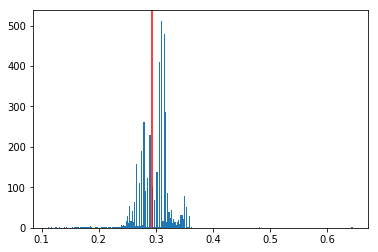

In [2]:
# Measure Creativity by counting objects.
#Idea: Threshold the image. Count fireballs. Then threshold the INVERSE image, count monsters.
from skimage import io, filters, color, measure
from scipy import ndimage
import matplotlib.pyplot as plt

im = color.rgb2gray(one_image)
val = filters.threshold_otsu(im)
plt.hist(im.ravel(), bins=256)
plt.axvline(val, color='r') #Showing the image histogram and the adaptive threshold
plt.show()

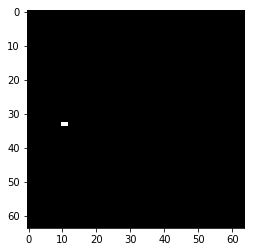

In [3]:
#As seen above, almost all pixels are below 0.4 Testing that as threshold. It captures all fireballs.
val = 0.4
binary = im>val
#drops = ndimage.binary_fill_holes(im < val)
#plt.imshow(drops, cmap='gray')
plt.imshow(binary, cmap='gray')
plt.show()

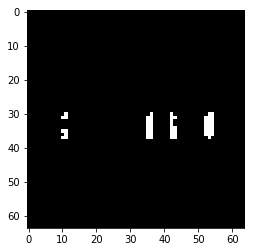

In [4]:
#Threshold image indicates that monsters are probably below 0.22. Testing that as a negative threshold.
neg_thresh = 0.23 #Found by experimentation.
binary_black = im<neg_thresh
plt.imshow(binary_black, cmap='gray')
plt.show()

5


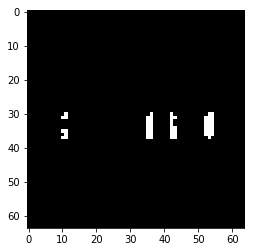

In [5]:
#Counting monsters
monsters = ndimage.binary_fill_holes(binary_black > 0.5)
plt.imshow(monsters, cmap='gray')
labels = measure.label(monsters)
print(labels.max())

1


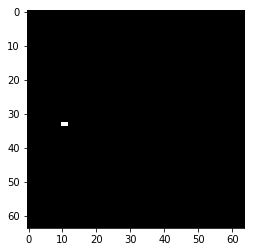

In [6]:
#Counting fireballs
balls = ndimage.binary_fill_holes(binary > 0.5)
plt.imshow(balls, cmap='gray')
ball_labels = measure.label(balls)
print(ball_labels.max())

In [8]:
#Testing my external library
from count_monsters_and_balls import count_monsters, count_fireballs
print(count_fireballs(one_image))
print(count_monsters(one_image))

1
5
